<a href="https://colab.research.google.com/github/ThakdanaiSaelee/Assignment_CE888/blob/main/Program/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library and function

In [130]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.dummy import DummyClassifier

# Libraries for pre-processing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [136]:
from numpy.core.fromnumeric import sort

# function for make the dataset to imbalanced dataset
def make_imbalance(df,output_class,percentage):
  df = df.sort_values(output_class, axis=0,ascending=True)
  x, y = df[output_class].value_counts(ascending=True)
  row = x * 100 / percentage
  return df.head(math.floor(row))

def baseline_result(data, output_class):
  x = data.drop(labels= output_class, axis=1)
  y = data[output_class]
  x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=50, stratify= y)

  dummy_clf = DummyClassifier(strategy='stratified')
  dummy_scores = cross_val_score(dummy_clf, x_train, y_train, cv=10, scoring = 'f1')
  print("dummy f1 score: %0.4f +/- %0.4f" % (dummy_scores.mean(), dummy_scores.std()))

In [127]:
class imbalance_dataset():
  def __init__(self, dataset):
    self.data = dataset
  
  # Plot histogram
  def hist_plot(self, width=20, height=15):
    _ = self.data.hist(bins=50, figsize=(width,height))
  # Plot heat map with linear correlation
  def heatmap(self, width=20, height=7):
    correlations = self.data.corr()
    f, ax = plt.subplots(figsize=(width, height))
    ax = sns.heatmap(correlations, annot=True, center=0,  cmap="YlGnBu")
  # Plot box plot
  def box_plot(self, width=20, height=7):
    f, ax = plt.subplots(figsize=(width, height))
    column = list(self.data.columns)
    ax = self.data.boxplot(column= column)

  def replace(self, label):
    self.data.replace(label, inplace=True)
    

# Mobile Price dataset

**Mobile price dataset**

In [64]:
# loadind the data
mobile_data = pd.read_csv('https://raw.githubusercontent.com/ThakdanaiSaelee/Assignment_CE888/main/Datasets/mobile_price_classification.csv')
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [65]:
# assign to class
mobile_data = imbalance_dataset(mobile_data)

In [66]:
mobile_data.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [67]:
mobile_data.data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [68]:
# group the data into two classes (binary classification)
label = {'price_range':{1:0, 2:1, 3:1}}
mobile_data.replace(label)
mobile_data.data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


In [69]:
mobile_data.data['price_range'].value_counts()

0    1000
1    1000
Name: price_range, dtype: int64

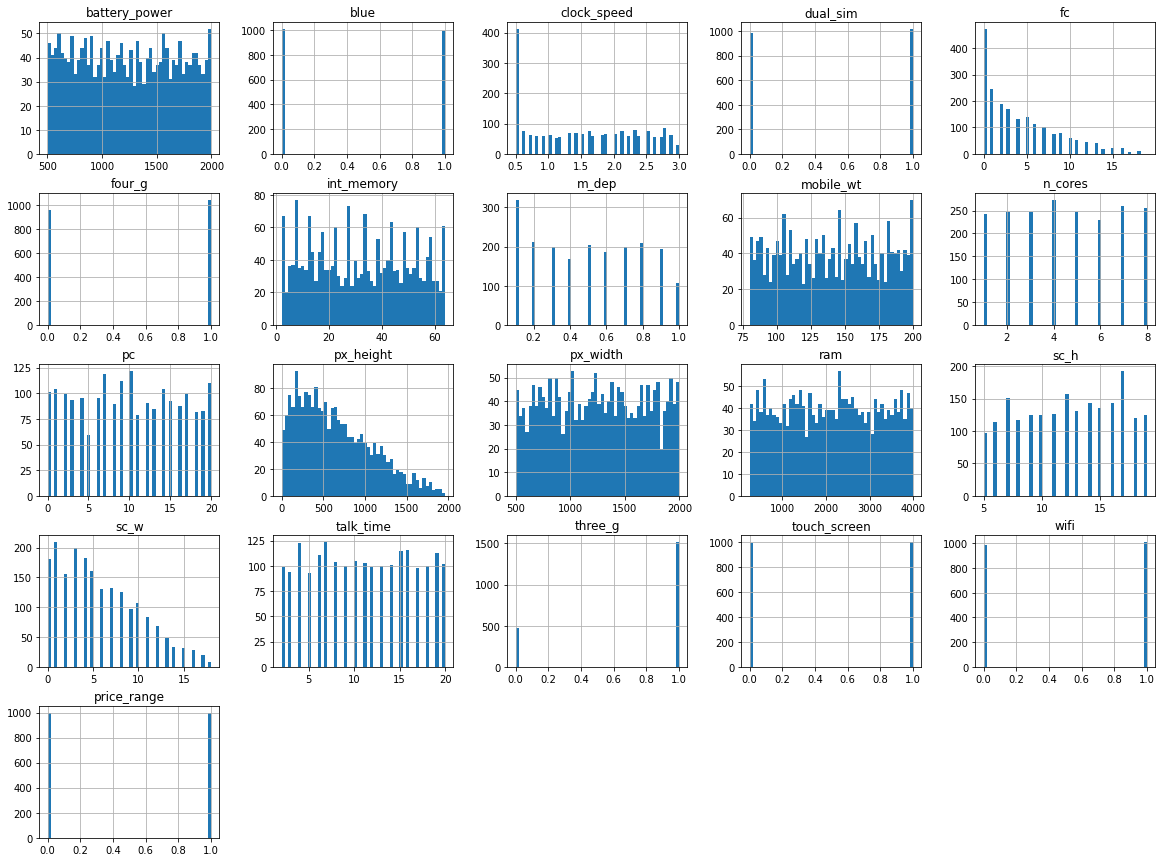

In [70]:
# plot histogram to see how the data distributed and categorical data
mobile_data.hist_plot()

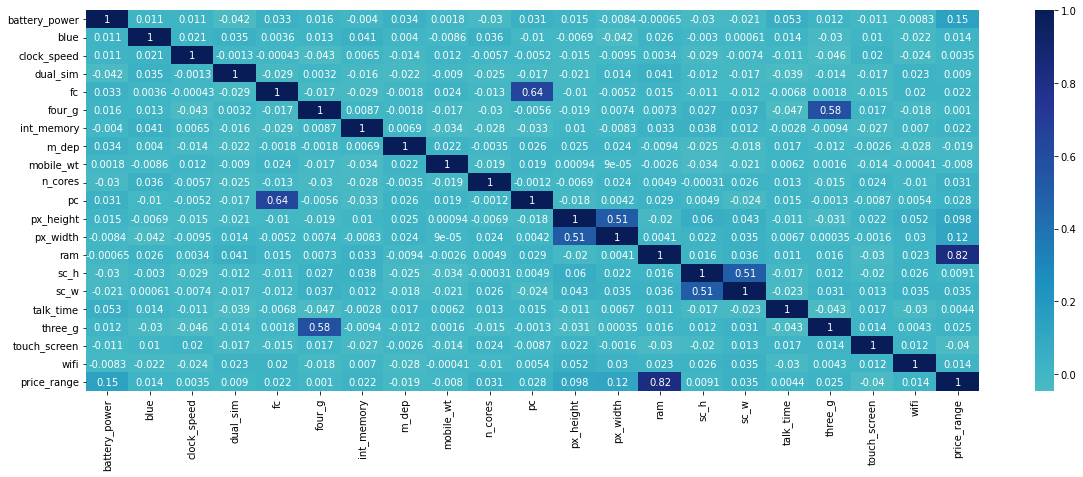

In [71]:
# Calculate the correlations between each pair of variables and plot on the heatmap
mobile_data.heatmap(20,7)

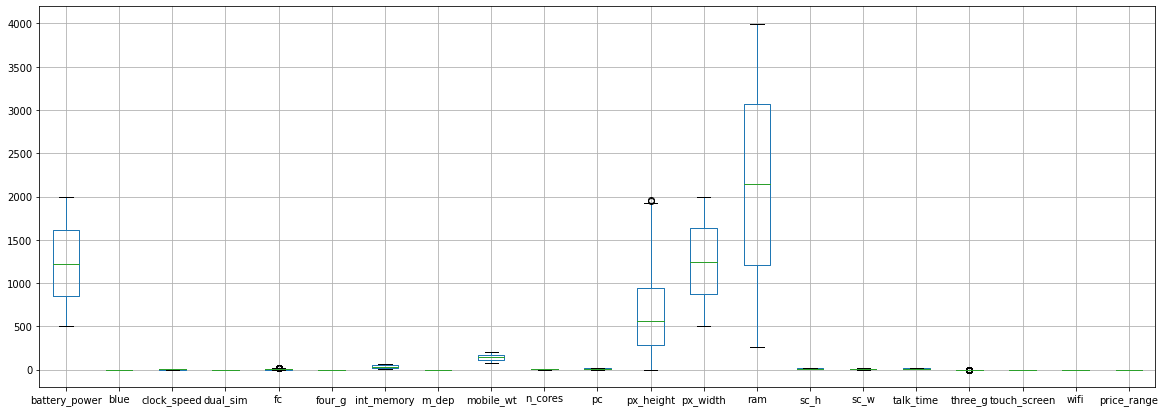

In [72]:
# plot the boxplot to see the scal of the data
mobile_data.box_plot()

In [73]:
# make imbalanced dataset 65 %
mobile_data_65 = make_imbalance(mobile_data.data,'price_range',65)
mobile_data_65['price_range'].value_counts()

0    1000
1     538
Name: price_range, dtype: int64

In [74]:
# make imbalanced dataset 75 %
mobile_data_75 = make_imbalance(mobile_data.data,'price_range',75)
mobile_data_75['price_range'].value_counts()

0    1000
1     333
Name: price_range, dtype: int64

In [75]:
# make imbalanced dataset 90 %
mobile_data_90 = make_imbalance(mobile_data.data,'price_range',90)
mobile_data_90['price_range'].value_counts()

0    1000
1     111
Name: price_range, dtype: int64

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
819,1236,0,0.9,1,2,1,57,0.1,188,1,...,517,809,1406,14,12,20,1,0,1,0
820,1387,0,0.5,0,0,1,61,0.5,98,3,...,785,1151,629,5,3,11,1,1,0,0
1567,940,0,2.9,0,0,0,16,0.7,115,4,...,499,1090,2192,15,13,9,1,1,1,0
823,1593,1,1.0,0,0,1,52,0.7,130,8,...,761,1336,1354,15,13,13,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,1579,1,0.5,1,0,0,5,0.2,88,7,...,1358,1739,3532,17,11,12,0,0,1,1
28,1453,0,1.6,1,12,1,52,0.3,96,2,...,187,1311,2373,10,1,10,1,1,1,1
27,956,0,0.5,0,1,1,41,1.0,143,7,...,511,1075,3286,17,8,12,1,1,0,1
26,519,1,1.6,1,7,1,51,0.3,132,4,...,550,645,3763,16,1,4,1,0,1,1


In [137]:
baseline_result(mobile_data_65,'price_range')

dummy f1 score: 0.3342 +/- 0.0572


In [138]:
baseline_result(mobile_data_75,'price_range')

dummy f1 score: 0.2504 +/- 0.0597


In [139]:
baseline_result(mobile_data_90,'price_range')

dummy f1 score: 0.0533 +/- 0.0856


# Raisin dataset

**Raisin dataset**

In [90]:
raisin_data = pd.read_csv('https://raw.githubusercontent.com/ThakdanaiSaelee/Assignment_CE888/main/Datasets/Raisin_Dataset.csv')
raisin_data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [91]:
# assign to class
raisin_data = imbalance_dataset(raisin_data)

In [92]:
raisin_data.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [93]:
raisin_data.data['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [94]:
# change output class into numeric data
label = {'Class':{'Kecimen':0, 'Besni':1}}
raisin_data.replace(label)
raisin_data.data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


In [95]:
raisin_data.data['Class'].value_counts()

0    450
1    450
Name: Class, dtype: int64

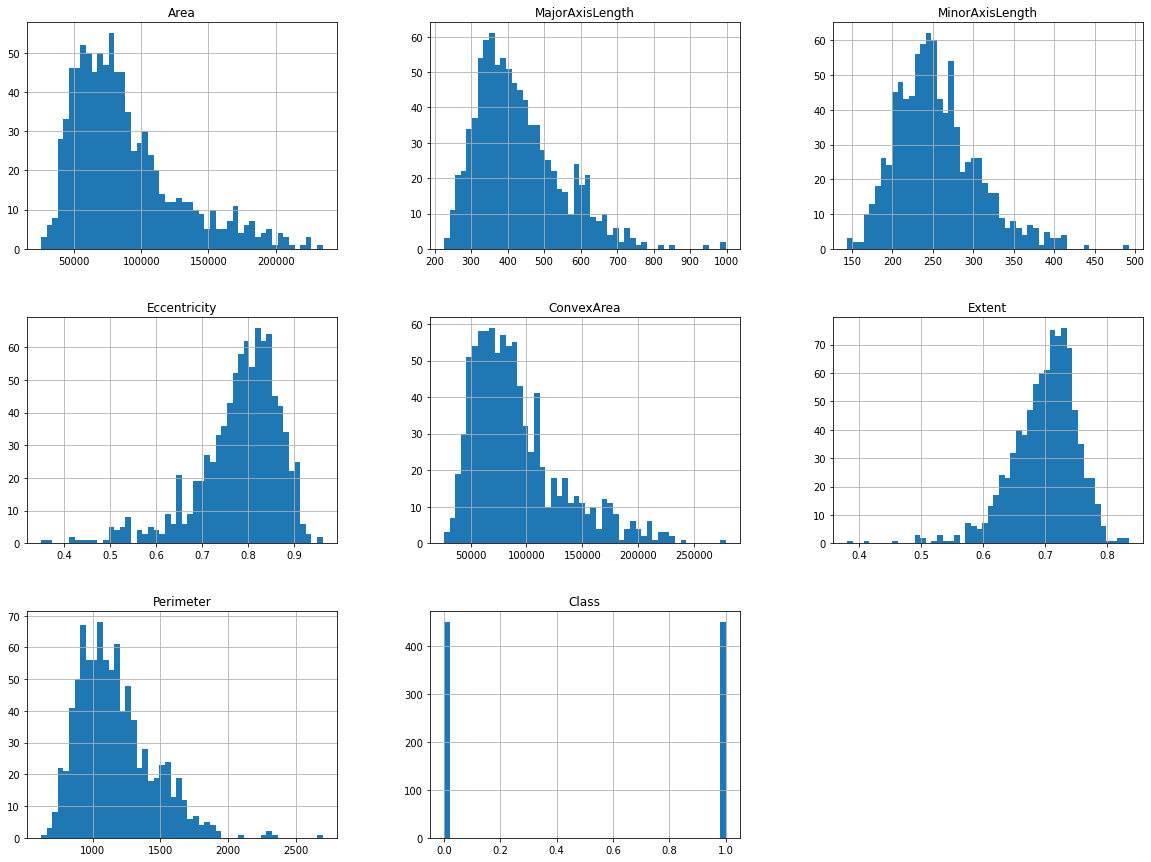

In [96]:
# plot histogram to see how the data distributed and categorical data
raisin_data.hist_plot()

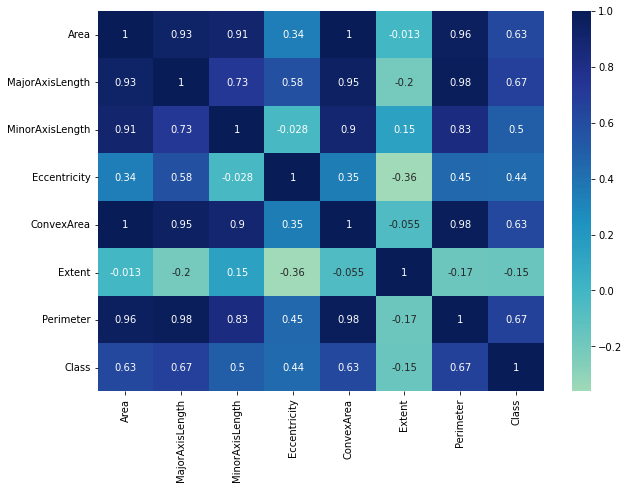

In [97]:
# Calculate the correlations between each pair of variables and plot on the heatmap
raisin_data.heatmap(width=10, height=7)

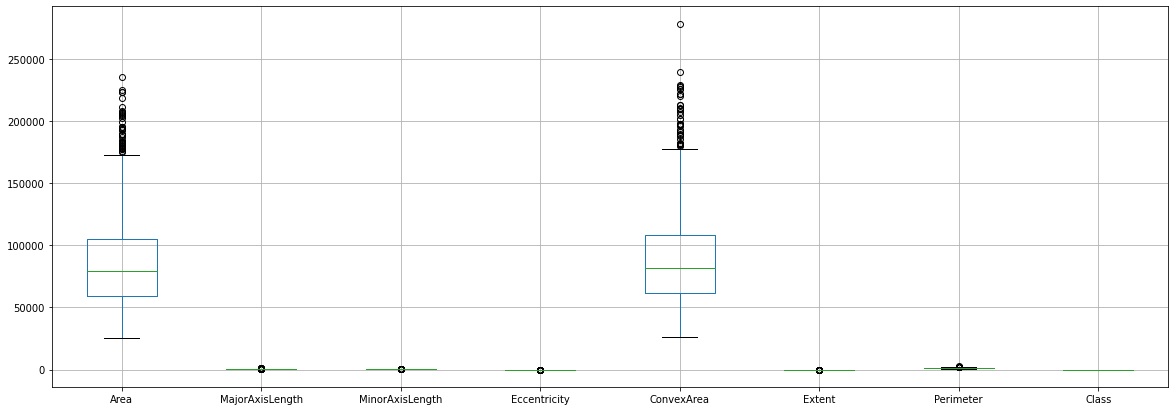

In [98]:
# plot the boxplot to see the scal of the data
raisin_data.box_plot()

In [99]:
# make imbalanced dataset 65 %
raisin_data_65 = make_imbalance(raisin_data.data,'Class',65)
raisin_data_65['Class'].value_counts()

0    450
1    242
Name: Class, dtype: int64

In [100]:
# make imbalanced dataset 75 %
raisin_data_75 = make_imbalance(raisin_data.data,'Class',75)
raisin_data_75['Class'].value_counts()

0    450
1    150
Name: Class, dtype: int64

In [101]:
# make imbalanced dataset 90 %
raisin_data_90 = make_imbalance(raisin_data.data,'Class',90)
raisin_data_90['Class'].value_counts()

0    450
1     50
Name: Class, dtype: int64

# Wine Quality dataset

**Wine quality dataset**

In [113]:
wine_data = pd.read_csv('https://raw.githubusercontent.com/ThakdanaiSaelee/Assignment_CE888/main/Datasets/WineQT.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [114]:
wine_data = imbalance_dataset(wine_data)

In [115]:
wine_data.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [116]:
# drop not relevant feature 'Id' and check values in output column
wine_data.data.drop(columns = 'Id', inplace=True)
wine_data.data['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [117]:
label = {'quality':{3:0, 4:0, 5:0, 6:1, 7:1, 8:1}}
wine_data.replace(label)
wine_data.data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [118]:
wine_data.data['quality'].value_counts()

1    621
0    522
Name: quality, dtype: int64

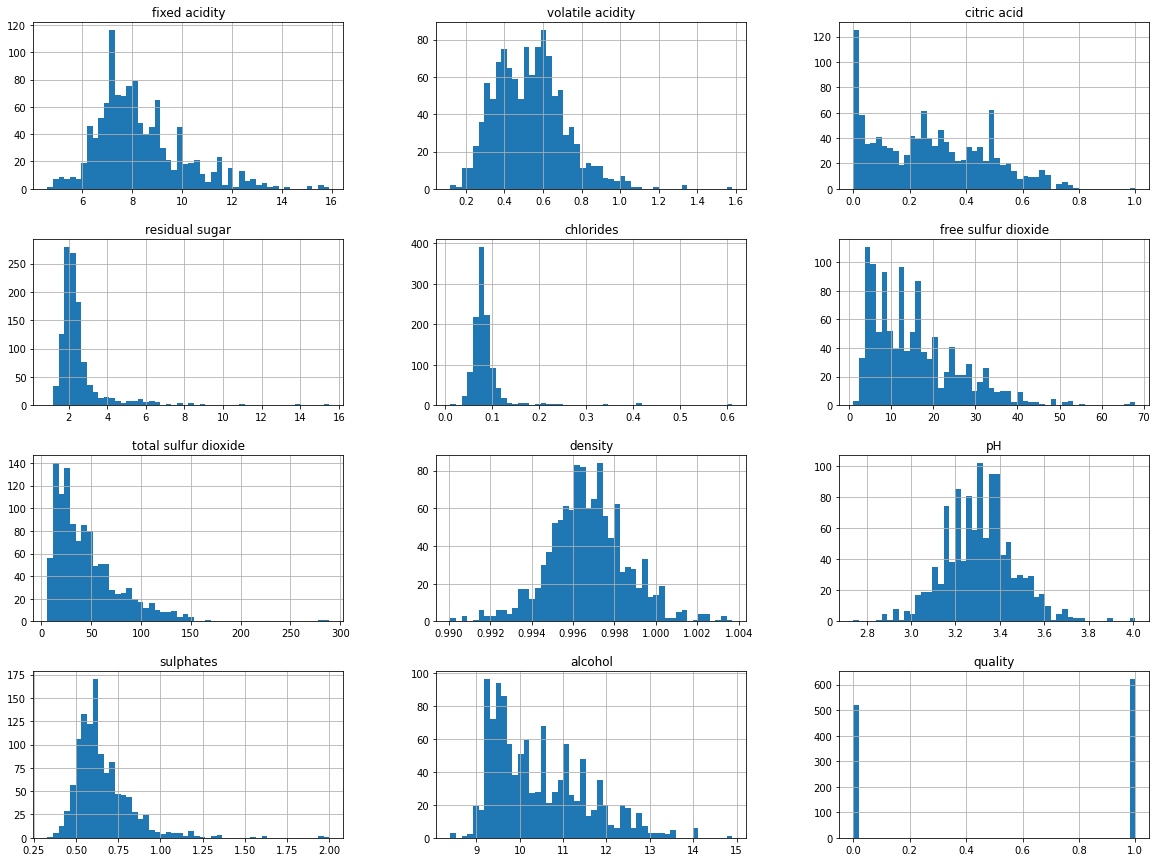

In [119]:
# plot histogram to see how the data distributed and categorical data
wine_data.hist_plot()

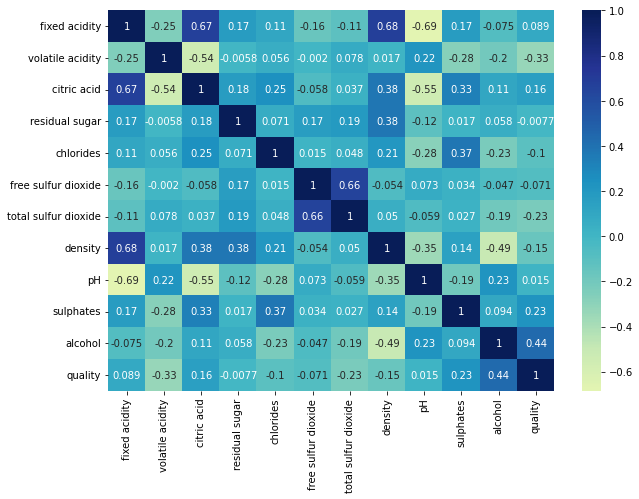

In [120]:
# Calculate the correlations between each pair of variables and plot on the heatmap
wine_data.heatmap(width=10,height=7)

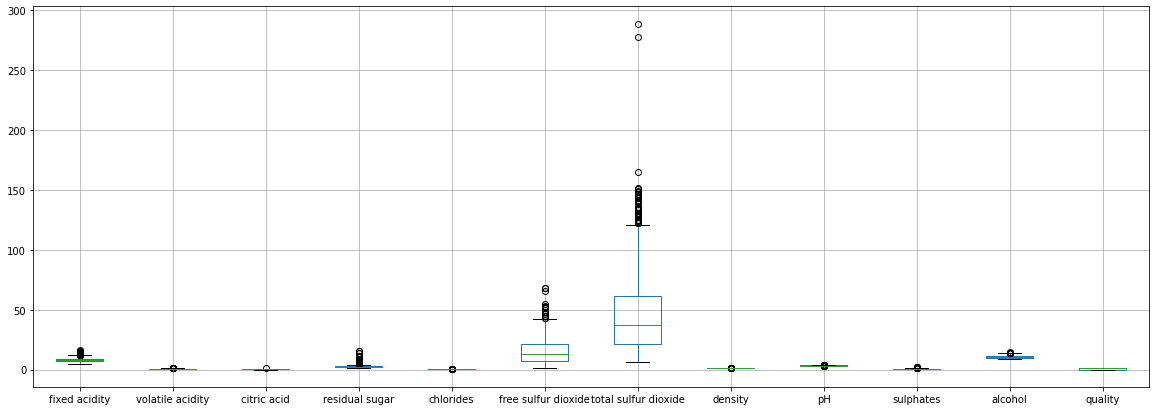

In [121]:
# plot the boxplot to see the scal of the data
wine_data.box_plot()

In [122]:
# make imbalanced dataset 65 %
wine_data_65 = make_imbalance(wine_data.data,'quality',65)
wine_data_65['quality'].value_counts()

0    522
1    281
Name: quality, dtype: int64

In [123]:
# make imbalanced dataset 75 %
wine_data_75 = make_imbalance(wine_data.data,'quality',75)
wine_data_75['quality'].value_counts()

0    522
1    174
Name: quality, dtype: int64

In [124]:
# make imbalanced dataset 90 %
wine_data_90 = make_imbalance(wine_data.data,'quality',90)
wine_data_90['quality'].value_counts()

0    522
1     58
Name: quality, dtype: int64